## Import libraries 

In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Reading dataset

In [3]:
data =pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
# describing whole the dataframe
data.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Here 3 columns are showing null values so filling them by their mode and mean.

## Encountering with null values

In [5]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']  = data['GRE Score'].fillna(data['GRE Score'].mean())

In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Now the data looks good and there are no missing values. Also, the first cloumn is just serial numbers, so we don' need that column. Let's drop it from data and make it more clean.

## Dropping unnecessary column

In [7]:
data= data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


## Visualization

Let's visualize the data and analyze the relationship between independent and dependent variables

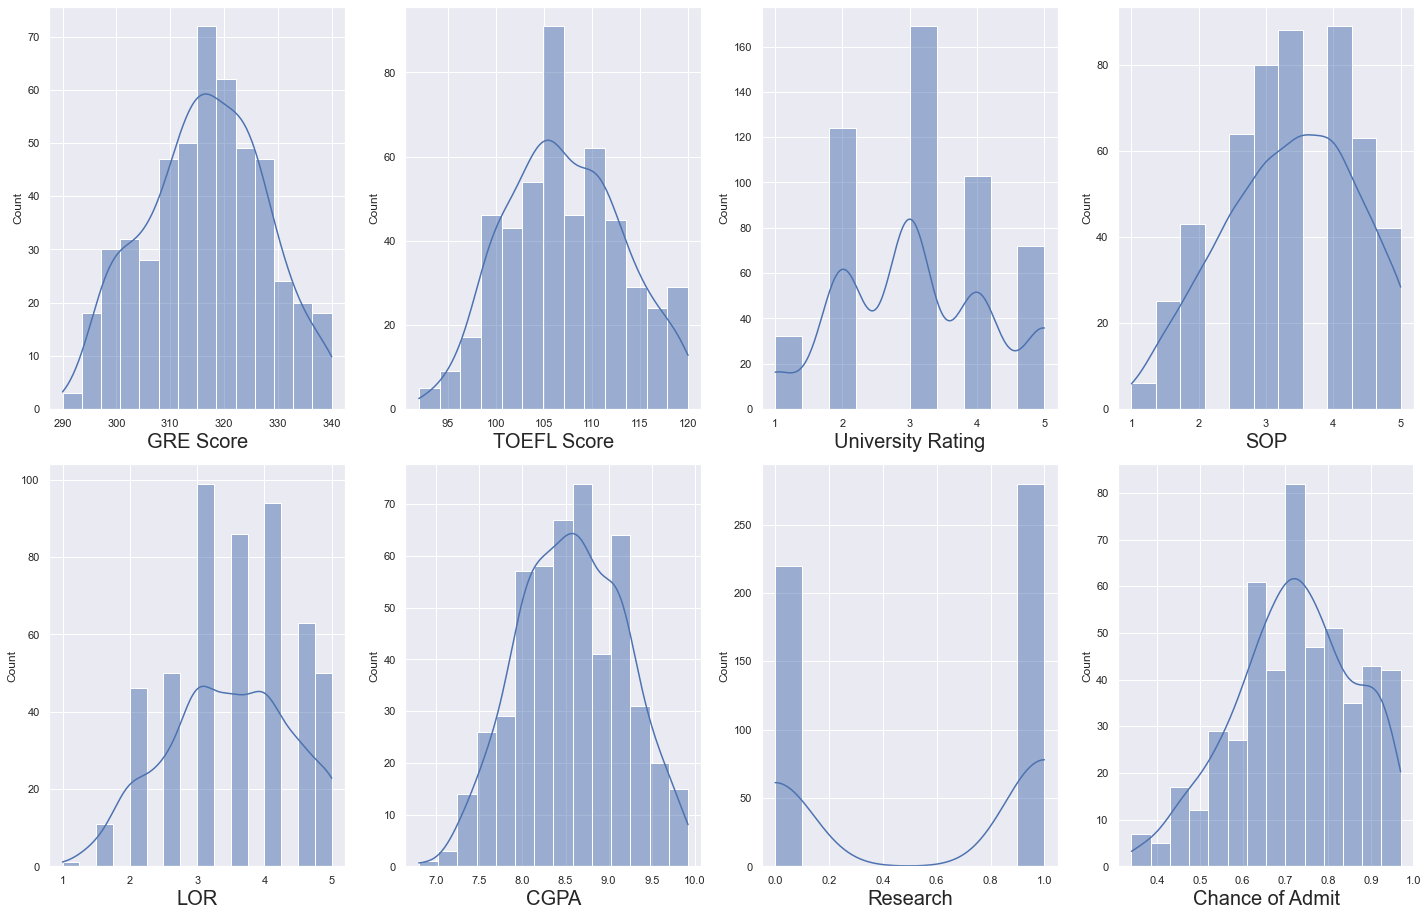

In [10]:
# let's see how data is distributed for every column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

The data distribution looks decent enough and there doesn't seem to be any skewness. Great let's go ahead!

## Observing relatiionship

Let's observe the relationship between independent variables and dependent variable.

In [11]:
y = data['Chance of Admit']
X =data.drop(columns = ['Chance of Admit'])

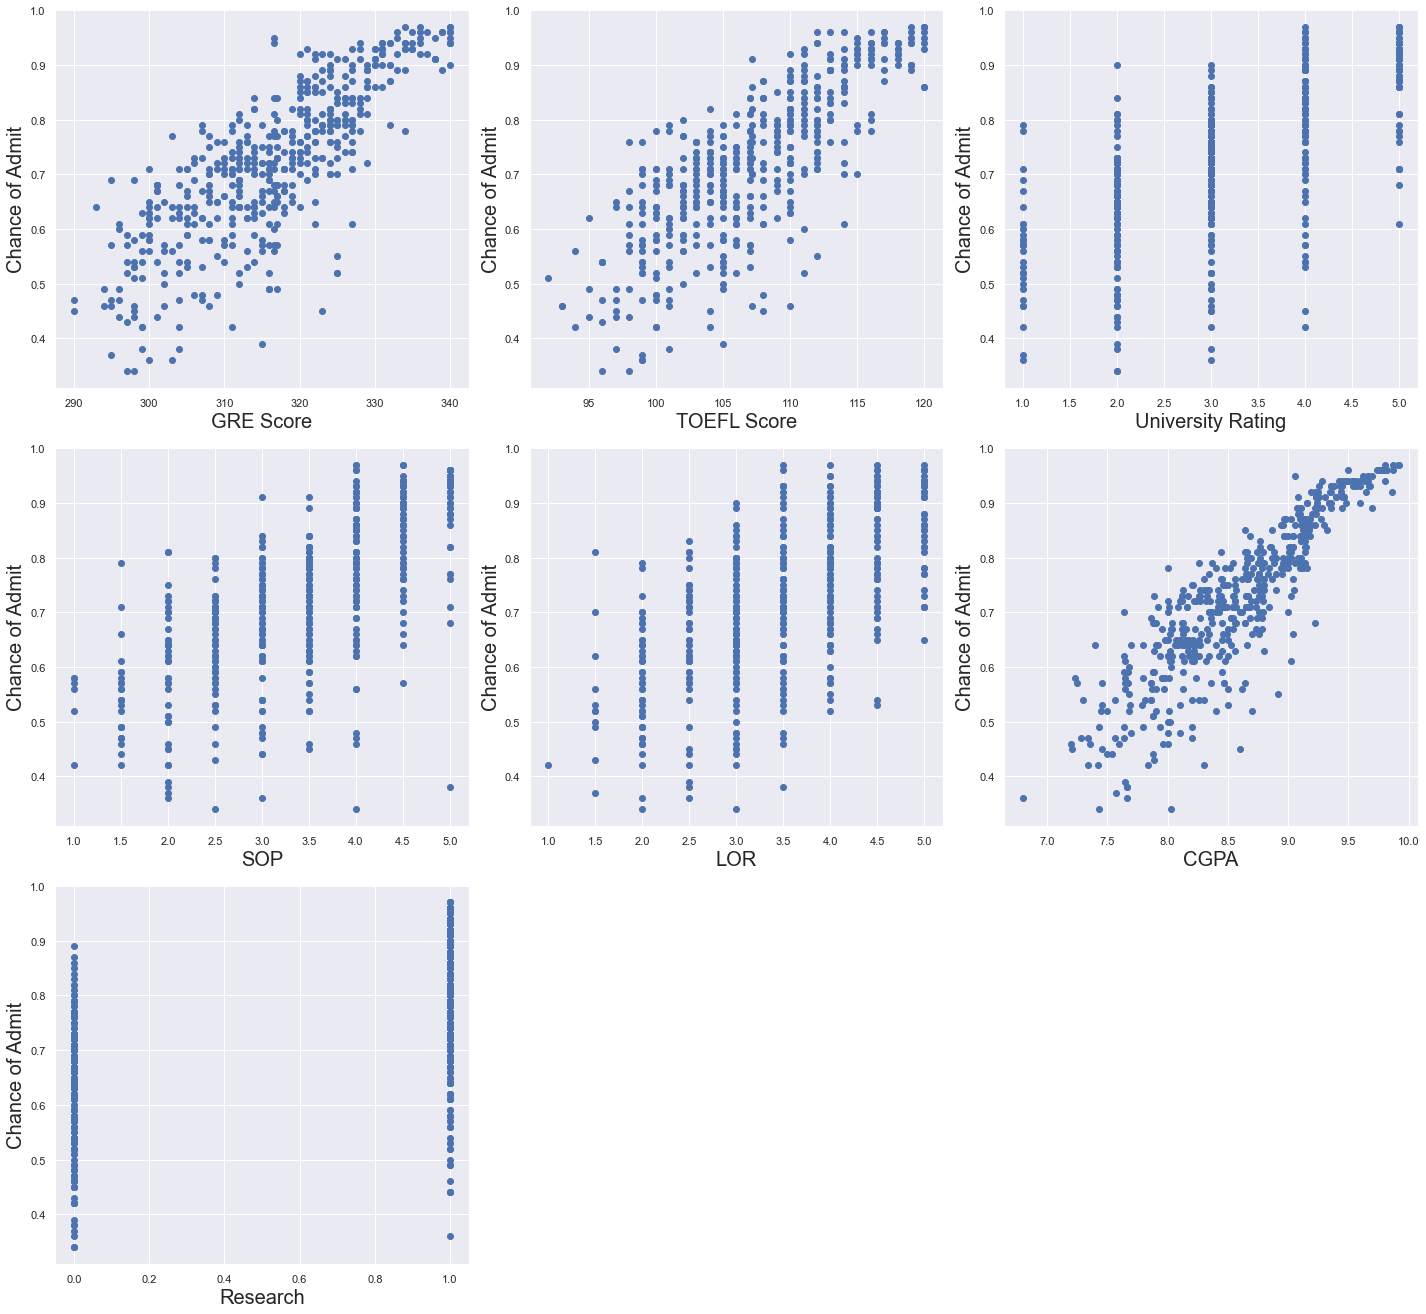

In [12]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear. Thus, our linearity assumption is satisfied.

Let's move ahead and check for multicollinearity.

## Checking multicollinearity

In [13]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs for each variable 
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do

vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]\

# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [15]:
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go.

Great. Let's go ahead and use linear regression and see how good it fits our data. But first. let's split our data in train and test.

## Spliting the dataset

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [17]:
y_train

378    0.56
23     0.95
122    0.57
344    0.47
246    0.72
       ... 
51     0.56
291    0.56
346    0.47
130    0.96
254    0.85
Name: Chance of Admit, Length: 375, dtype: float64

## Creating the model

In [18]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

## Saving the model

In [20]:
# saving the model to the local file system
import pickle
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

## Prediction

In [21]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

array([0.92190162])

In [22]:
regression.score(x_train,y_train)

0.8415250484247909

In [23]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [24]:
adj_r2(x_train,y_train)

0.8385023654247188

So it looks like our model r2 score is less on the test data.

Let's see if our model is overfitting our training data.

## Checking overfitness by using regularization technique.

- 1. Lasso Regularization
- 2. Ridge
- 3. Elastic Net

## LassoCV

In [25]:
# LassoCV will return best alpha and coefficients after performing 10 cross validations

lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [26]:
# best alpha parameter

alpha = lasscv.alpha_
alpha

3.0341655445178153e-05

## LASSO Regression

In [27]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.0341655445178153e-05)

In [28]:
lasso_reg.score(x_test, y_test)

0.7534654960492284

our r2_score for test data (75.34%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

## RidgeCV

In [29]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([1.12965416, 6.15856603, 8.20491801, 7.95676366, 6.35595028,
       7.67828581, 3.34846359, 9.56470606, 8.72886042, 8.15720562,
       2.12863507, 8.7657902 , 1.89402397, 4.85290231, 7.94449555,
       8.83957153, 7.33393447, 9.13329517, 9.46925266, 9.68525754,
       5.83562543, 5.88314733, 9.60984185, 8.93377224, 6.61142493,
       3.28929241, 9.74646216, 1.8227834 , 9.63246971, 6.35890928,
       8.53054993, 6.85251281, 1.62487322, 6.9522292 , 2.61537616,
       7.88766729, 7.2567589 , 7.08241967, 1.72652757, 2.66782858,
       1.21902561, 8.33853663, 7.99635661, 1.60331411, 7.93502792,
       9.92283988, 7.0354309 , 9.69711278, 6.17465982, 0.76135798]),
        cv=10, normalize=True)

In [30]:
ridgecv.alpha_

0.7613579795218417

## Ridge regression model

In [31]:
# Making Ridge regression model

ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.7613579795218417)

In [32]:
ridge_model.score(x_test, y_test)

0.7538554393357602

we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

## ElasticNetCV

In [33]:
# Elastic net CV will return best alpha and coefficients after performing 10 cross validations. 

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [34]:
elasticCV.alpha_

0.0011069728449315508

In [35]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal preference to L1 
#and L2
elasticCV.l1_ratio

0.5

## ElasticNet regression model

In [36]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0011069728449315508)

In [37]:
elasticnet_reg.score(x_test, y_test)

0.7531695370639868

**So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.**